Lambda = 20

In [8]:
import pandas as pd
from scipy import optimize
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
import math


Estimated ω: 6.639379374073431e-05


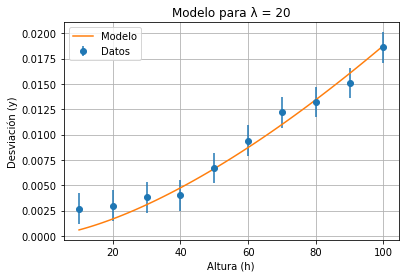

In [9]:
df = pd.read_csv("DataRotacion.csv")

df = df[df['angle'] == 20] 


def coriolis_desviacion(h, p, lambda_, g):
    """
    Calcula la desviación en el eje y debido al efecto Coriolis.
    
    Argumentos:
    - h: altura inicial de caída
    - p: parámetro de ajuste (p = ω)
    - lambda_: latitud
    - g: aceleración de la gravedad
    
    Retorna:
    - desviacion: desviación en el eje y debido al efecto Coriolis
    """
    desviacion = (2 * math.sqrt(2) / 3) * p * math.cos(math.radians(lambda_)) * math.sqrt(h / (3 * g))
    
    return desviacion


# Definir la función χ^2
def chi2(omega):
    chi2 = 0.0
    for i in range(len(df)):
        h = df.loc[i, 'h']
        y = df.loc[i, 'y']
        sigmay = df.loc[i, 'sigmay']
        expected_y = (2 * (omega * np.cos(np.radians(lambda_value))) * h ** (3/2)) / (3 * np.sqrt(2) * g)
        chi2 += ((y - expected_y) / sigmay) ** 2
    return chi2

# Valores conocidos
lambda_value = 20.0
g = 9.81


# Función objetivo
def objective(params, data):
    h, y, sigmay, angle, g = data
    omega = params[0]
    predicted_y = (2 * np.sqrt(2) / 3) * omega * np.cos(np.radians(angle)) * (h ** (3/2)) / np.sqrt(g)
    return (y - predicted_y) / sigmay

# DataFrame con los datos
df = pd.DataFrame({
    'h': [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0],
    'angle': [20.0] * 10,
    'y': [0.0027, 0.003, 0.0038, 0.004, 0.0067, 0.0094, 0.0122, 0.0132, 0.0151, 0.0186],
    'sigmay': [0.0015] * 10,
    'g': [9.81] * 10
})

# Datos de entrada para la optimización
data = df[['h', 'y', 'sigmay', 'angle', 'g']].values.T

# Valor inicial para ω
initial_omega = 1e-5

# Realizar la optimización
result = least_squares(objective, [initial_omega], args=(data,))

# Obtener el valor estimado de ω
estimated_omega = result.x[0]

print("Estimated ω:", estimated_omega)


# Función modelo
def model(h, omega, angle, g):
    return (2 * np.sqrt(2) / 3) * omega * np.cos(np.radians(angle)) * (h ** (3/2)) / np.sqrt(g)


# Valores de altura para el modelo
h_values = np.linspace(df['h'].min(), df['h'].max(), 100)

# Valores de desviación del modelo
model_values = model(h_values, estimated_omega, df['angle'].iloc[0], df['g'].iloc[0])

# Gráfico
plt.errorbar(df['h'], df['y'], yerr=df['sigmay'], fmt='o', label='Datos')
plt.plot(h_values, model_values, label='Modelo')
plt.xlabel('Altura (h)')
plt.ylabel('Desviación (y)')
plt.title('Modelo para λ = 20')
plt.legend()
plt.grid(True)
plt.show()

    Gravity
0  9.809695
1  9.810355
2  9.809732
3  9.809431
4  9.809725


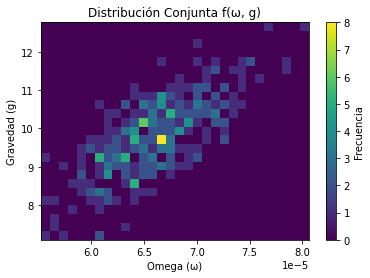

In [10]:
# Datos experimentales
df = pd.DataFrame({
    'h': [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0],
    'angle': [20.0] * 10,
    'y': [0.0027, 0.003, 0.0038, 0.004, 0.0067, 0.0094, 0.0122, 0.0132, 0.0151, 0.0186],
    'sigmay': [0.0015] * 10,
    'g': [9.81] * 10
})

# Número de iteraciones
N = 300

# Lista para almacenar los valores remuestreados de la gravedad
gravity_values = []

# Bucle for para el remuestreo
for i in range(N):
    # Remuestreo de la gravedad (ejemplo: agregar un error aleatorio normalmente distribuido)
    gravity_sampled = np.random.normal(df['g'], scale=0.001)
    # Calcular la media del remuestreo
    gravity_mean = np.mean(gravity_sampled)
    # Agregar el valor a la lista
    gravity_values.append(gravity_mean)

# Convertir la lista en un DataFrame
gravity_df = pd.DataFrame({'Gravity': gravity_values})

# Imprimir el DataFrame con los valores remuestreados de la gravedad
print(gravity_df.head())


# Número de iteraciones para el remuestreo
N = 300

# Array para almacenar los valores de gravedad
Gravedad = np.zeros(N)

# Array para almacenar las estimaciones de la rapidez angular
Omega = np.zeros(N)

# Bucle for para realizar el remuestreo N veces
for i in range(N):
    # Generar un valor de gravedad siguiendo la distribución normal
    gravedad = 9.81 + np.random.normal(loc=0, scale=1)
    
    # Guardar el valor de gravedad en el array Gravedad
    Gravedad[i] = gravedad
    
    # Modificar los puntos experimentales mediante bootstrapping
    df_modificado = df.copy()
    df_modificado['y'] += np.random.normal(loc=0, scale=df['sigmay'], size=len(df))
    
    # Extraer los datos relevantes del DataFrame
    h = df_modificado['h']
    angle = df_modificado['angle']
    y_modificado = df_modificado['y']
    sigmay = df_modificado['sigmay']
    
    # Definir la función de ajuste para la optimización
    def funcion_ajuste(omega):
        return np.sum((model(h, omega, angle, gravedad) - y_modificado) ** 2 / sigmay ** 2)
    
    # Estimación inicial de la rapidez angular
    omega_inicial = 1e-5
    
    # Realizar la optimización para obtener la estimación de la rapidez angular
    resultado = optimize.minimize(funcion_ajuste, omega_inicial)
    omega_estimado = resultado.x[0]
    
    # Guardar el valor estimado de la rapidez angular en el array Omega
    Omega[i] = omega_estimado

# Definir el tamaño de los bins para la distribución conjunta
binsx = 30  # Número de bins en el eje x (omega)
binsy = 25  # Número de bins en el eje y (gravedad)

# Generar la distribución conjunta utilizando np.histogram2d
H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=(binsx, binsy))

# Plotear la distribución conjunta
plt.imshow(H2.T, origin='lower', aspect='auto', cmap='viridis',
           extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]])
plt.colorbar(label='Frecuencia')
plt.xlabel('Omega (ω)')
plt.ylabel('Gravedad (g)')
plt.title('Distribución Conjunta f(ω, g)')
plt.show()

In [11]:
df = pd.DataFrame({'Omega': Omega, 'Gravedad': Gravedad})


pearson_corr = df['Omega'].corr(df['Gravedad'], method='pearson')


spearman_corr = df['Omega'].corr(df['Gravedad'], method='spearman')

print("Coeficiente de correlación de Pearson:", pearson_corr)
print("Coeficiente de correlación de Spearman:", spearman_corr)


Coeficiente de correlación de Pearson: 0.7311102095381738
Coeficiente de correlación de Spearman: 0.6975775286392071


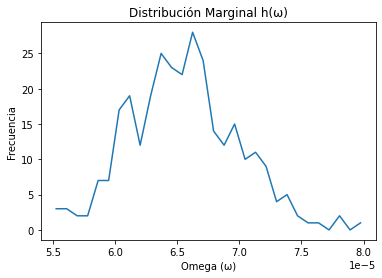

In [12]:

H1 = np.sum(H2, axis=1)


plt.plot(binsx[:-1], H1)
plt.xlabel('Omega (ω)')
plt.ylabel('Frecuencia')
plt.title('Distribución Marginal h(ω)')
plt.show()

In [13]:
cs = np.cumsum(H1)

ij = np.searchsorted(cs, np.percentile(cs, 16))
ii = np.searchsorted(cs, np.percentile(cs, 50))
ji = np.searchsorted(cs, np.percentile(cs, 84))

omega_lower = binsx[ij]
omega_estimated = binsx[ii]
omega_upper = binsx[ji]

print("Mejor estimador ˆω: ", omega_estimated)
print("Intervalo de confianza a un sigma de desviación: [", omega_lower, ", ", omega_upper, "]")

Mejor estimador ˆω:  6.792060691502313e-05
Intervalo de confianza a un sigma de desviación: [ 5.946408811298495e-05 ,  7.637712571706133e-05 ]


In [14]:
omega_20 = round((omega_estimated/10**(-5)),2)
IC_up_20 = round((omega_upper/10**(-5)),2)
IC_lo_20 = round((omega_lower/10**(-5)),2)
print(omega_20)
print(IC_lo_20)
print(IC_up_20)

6.79
5.95
7.64
